# CT Images Denoising - Deep Learning Models

Description of the jupyter notebook and maybe brief overview of the all project.

**Authors:** [Raphaël Achddou](https://people.epfl.ch/raphael.achddou) ([contact](mailto:raphael.achddou@epfl.ch)), [Paulo Ribeiro](https://people.epfl.ch/paulo.ribeirodecarvalho) ([contact](mailto:paulo.ribeirodecarvalho@epfl.ch))

**References:**
[1] FFDNet: Toward a Fast and Flexible Solution for CNN based Image Denoising ([link](https://arxiv.org/abs/1710.04026))
[2] Plug-and-Play Image Restoration with Deep Denoiser Prior ([link](https://arxiv.org/abs/2008.13751))
[3] Beyond a Gaussian Denoiser: Residual Learning of Deep CNN for Image Denoising ([link](https://arxiv.org/abs/1608.03981))
[4] An Analysis and Implementation of the FFDNet Image Denoising Method ([link](http://www.ipol.im/pub/art/2019/231/))
[5] Github from paper author cszn ([link](https://github.com/cszn/KAIR))

## Import

In [1]:
from models.cnn_viewer import CnnViewer

## Load Data

## Models

In this work, we will be using three architecture from the simpler to the more accurate model. We start with the DNCNN [[1](https://github.com/cszn/KAIR/blob/master/main_train_dncnn.py), [2](https://github.com/cszn/DnCNN/tree/master/TrainingCodes/dncnn_pytorch)], followed by the FFDNET [[3](http://www.ipol.im/pub/art/2019/231/)] and finally with DRUNET [[4](https://github.com/cszn/DPIR)].

Let's maybe use models that have been made for the Grand Challenge.
RED-CNN [[5](https://github.com/SSinyu/RED-CNN)]
CT-FORMER [[6](https://github.com/wdayang/CTformer)]

summary of few methods and their papers [here](https://github.com/SSinyu/CT-Denoising-Review/blob/master/README.md).

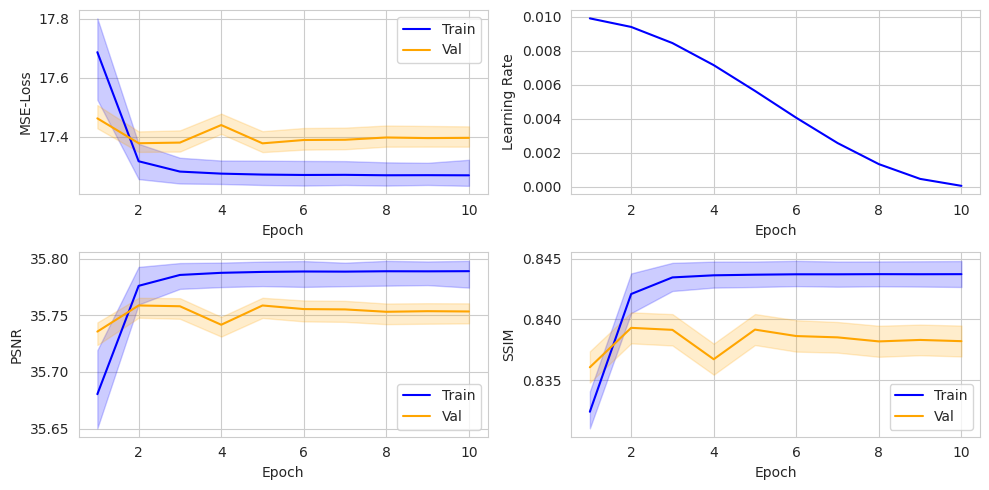

In [4]:
cnn = CnnViewer(model_path='models/dncnn/2024-04-12 13h54m48s/training_save_epoch_10.tar',
                model_name='DnCNN',
                device='cuda')

cnn.print_training_stats()

## Results